In [1]:
import sys
sys.path.append('../preprocess_assets/')

In [2]:
import gensim
from sklearn.decomposition import PCA
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import arabic_reshaper
import pandas as pd
from word2vec_results import *

In [3]:
rezk_model = gensim.models.Word2Vec.load("Twittert-CBOW/fullgram/CBOW_space_300/min_count_100/window_3/continuous_bow_fullgram_vec_size_300-d_min_count_100")

bakr_model = gensim.models.Word2Vec.load("full_grams_cbow_300_twitter.mdl")

muhammed_model= gensim.models.Word2Vec.load("w2v_CBOW_300_3_400_10.model")


In [4]:
vocabs = list(rezk_model.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))

The number of words the model learn from your dataset are: 2027042


In [5]:
vocabs = list(bakr_model.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))

The number of words the model learn from your dataset are: 1476715


In [6]:
vocabs = list(muhammed_model.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))

The number of words the model learn from your dataset are: 49555


In [7]:
tokens_to_graphs = {
    'O_+_token': [],
    'O_+_%': [],
    '🤣_token': [],
    '🤣_%': [],
    '🇰🇼_token': [],
    '🇰🇼_%': [],
    '🏡_token': [],
    '🏡_%': [],
    'IT_token': [],
    'IT_%': [],
    '؟_token': [],
    '؟_%': [],
    'كوفيد_token': [],
    'كوفيد_%': [],
    'منصه_مدرستي_token': [],
    'منصه_مدرستي_%': [],
    'بوابه_المستقبل_token': [],
    'بوابه_المستقبل_%': [],
    'الدراسه_مستمره_token': [],
    'الدراسه_مستمره_%': [],
    'التعلم_عن_بعد_token': [],
    'التعلم_عن_بعد_%': [],
        'كايرو_token': [],
    'كايرو_%': [],
            'ينتصر_token': [],
    'ينتصر_%': [],
            'خريج_token': [],
    'خريج_%': [],
        'ويجز_token': [],
    'ويجز_%': [],
        '🌸_token': [],
    '🌸_%': [],
            '🔑_token': [],
    '🔑_%': [],
        'بنغازي_token': [],
    'بنغازي_%': [],
    'القدس_عربيه_token': [],
    'القدس_عربيه_%': [],
}

In [8]:
bakr_tokens_to_graphs = {
    '🏡_token': [],
    '🏡_%': [],
    '؟_token': [],
    '؟_%': [],
    'بنغازي_token': [],
    'بنغازي_%': [],
    'كايرو_token': [],
    'كايرو_%': [],
        '🔑_token': [],
    '🔑_%': [],
    '🌸_token': [],
    '🌸_%': [],

        'ينتصر_token': [],
    'ينتصر_%': [],
            'خريج_token': [],
    'خريج_%': [],
        'ويجز_token': [],
    'ويجز_%': [],
}

In [9]:
muhammed_tokens_to_graphs = {
        'ينتصر_token': [],
    'ينتصر_%': [],
            'خريج_token': [],
    'خريج_%': [],
}

In [10]:
similar_tokens = rezk_model.wv.most_similar('ينتصر')
for similar in similar_tokens:
    tokens_to_graphs['ينتصر_token'].append(similar[0])
    tokens_to_graphs['ينتصر_%'].append(similar[1])

In [11]:
similar_tokens

[('انتصر', 0.651455283164978),
 ('يقاتل', 0.6465153098106384),
 ('يحارب', 0.5891581773757935),
 ('يواجه', 0.5724115967750549),
 ('سينتصر', 0.5710309147834778),
 ('يستسلم', 0.5659409761428833),
 ('ينهزم', 0.5622171759605408),
 ('يخسر', 0.559613823890686),
 ('يهزم', 0.5417757034301758),
 ('يسقط', 0.5411337018013)]

In [12]:
similar_tokens = bakr_model.wv.most_similar('ينتصر')
for similar in similar_tokens:
    bakr_tokens_to_graphs['ينتصر_token'].append(similar[0])
    bakr_tokens_to_graphs['ينتصر_%'].append(similar[1])

In [13]:
similar_tokens

[('انتصر', 0.6460888385772705),
 ('تنتصر', 0.6231251358985901),
 ('سينتصر', 0.6034882664680481),
 ('يستسلم', 0.6003603339195251),
 ('يهزم', 0.596508800983429),
 ('ننتصر', 0.5851215720176697),
 ('يتغلب', 0.5742601752281189),
 ('ينحاز', 0.5628108382225037),
 ('يرضخ', 0.5458214282989502),
 ('يقول_كلمته', 0.542996346950531)]

In [14]:
similar_tokens = muhammed_model.wv.most_similar('ينتصر')
for similar in similar_tokens:
    muhammed_tokens_to_graphs['ينتصر_token'].append(similar[0])
    muhammed_tokens_to_graphs['ينتصر_%'].append(similar[1])

In [15]:
similar_tokens

[('ينتص', 0.6200209856033325),
 ('ينت', 0.556247353553772),
 ('يحارب', 0.4712071418762207),
 ('ين', 0.34299731254577637),
 ('انتصر', 0.3315746486186981),
 ('تنتصر', 0.33046194911003113),
 ('يعود', 0.3167138993740082),
 ('انتصرت', 0.3106973469257355),
 ('تءتي', 0.30553698539733887),
 ('سلمان', 0.3003996014595032)]

In [16]:
similar_tokens = rezk_model.wv.most_similar('خريج')
for similar in similar_tokens:
    tokens_to_graphs['خريج_token'].append(similar[0])
    tokens_to_graphs['خريج_%'].append(similar[1])

In [17]:
similar_tokens

[('تخصص', 0.7142242789268494),
 ('هندسه', 0.7090756893157959),
 ('دبلوم', 0.6927738785743713),
 ('متخرج', 0.6869535446166992),
 ('كليه', 0.6784682273864746),
 ('جامعه', 0.6749193668365479),
 ('دارس', 0.6581009030342102),
 ('خريجه', 0.6541006565093994),
 ('مدرس', 0.6437668204307556),
 ('بكالوريوس', 0.6400926113128662)]

In [18]:
similar_tokens = bakr_model.wv.most_similar('خريج')
for similar in similar_tokens:
    bakr_tokens_to_graphs['خريج_token'].append(similar[0])
    bakr_tokens_to_graphs['خريج_%'].append(similar[1])

In [19]:
similar_tokens

[('متخرج', 0.7290518879890442),
 ('خريج_كليه', 0.6631026864051819),
 ('وخريج', 0.6372433304786682),
 ('بكلوريوس', 0.6184447407722473),
 ('مهندس', 0.6107056736946106),
 ('كطالب', 0.599929690361023),
 ('طالب', 0.5964147448539734),
 ('ومتخرج', 0.5926499366760254),
 ('بكالريوس', 0.5886915326118469),
 ('خريجين', 0.588064968585968)]

In [20]:
similar_tokens = muhammed_model.wv.most_similar('خريج')
for similar in similar_tokens:
    muhammed_tokens_to_graphs['خريج_token'].append(similar[0])
    muhammed_tokens_to_graphs['خريج_%'].append(similar[1])

In [21]:
similar_tokens

[('متخرج', 0.7610599398612976),
 ('خريجه', 0.5955337285995483),
 ('بكالريوس', 0.5821039080619812),
 ('خريجي', 0.5499259233474731),
 ('خريجين', 0.5483648777008057),
 ('متخرجه', 0.5453131198883057),
 ('دارس', 0.5396440625190735),
 ('طالب', 0.5366575717926025),
 ('بكالوريس', 0.5298030376434326),
 ('بكالوريوس', 0.5252522230148315)]

In [22]:
similar_tokens = rezk_model.wv.most_similar('🌸')
for similar in similar_tokens:
    tokens_to_graphs['🌸_token'].append(similar[0])
    tokens_to_graphs['🌸_%'].append(similar[1])

In [23]:
similar_tokens

[('🌼', 0.7827603816986084),
 ('🌺', 0.7816051244735718),
 ('🌷', 0.7739440202713013),
 ('🕊', 0.7702279686927795),
 ('🌹', 0.7598779201507568),
 ('🍃', 0.7443662285804749),
 ('🌿', 0.7275475859642029),
 ('⚘', 0.6947581768035889),
 ('🌻', 0.6937013268470764),
 ('💐', 0.6767349243164062)]

In [24]:
similar_tokens = bakr_model.wv.most_similar('🌸')
for similar in similar_tokens:
    bakr_tokens_to_graphs['🌸_token'].append(similar[0])
    bakr_tokens_to_graphs['🌸_%'].append(similar[1])

In [25]:
similar_tokens

[('🍃', 0.8405100107192993),
 ('💕', 0.8223419785499573),
 ('💜', 0.8145712614059448),
 ('✨', 0.8067425489425659),
 ('💗', 0.7939425706863403),
 ('🌿', 0.7814812064170837),
 ('💓', 0.7685064077377319),
 ('🍂', 0.7592586874961853),
 ('🌸🍃', 0.755847156047821),
 ('💞', 0.7555315494537354)]

In [26]:
similar_tokens = rezk_model.wv.most_similar('🔑')
for similar in similar_tokens:
    tokens_to_graphs['🔑_token'].append(similar[0])
    tokens_to_graphs['🔑_%'].append(similar[1])

In [27]:
similar_tokens

[('مفتاح', 0.4421654939651489),
 ('🗝', 0.38557443022727966),
 ('🎯', 0.3628891706466675),
 ('🅰️', 0.34200042486190796),
 ('#_كلبه_مطيعه', 0.3347412347793579),
 ('المفتاح', 0.3305990993976593),
 ('♾', 0.32080593705177307),
 ('◉', 0.3206290006637573),
 ('✅', 0.3132442533969879),
 ('مفاتيح', 0.31249940395355225)]

In [28]:
similar_tokens = bakr_model.wv.most_similar('🔑')
for similar in similar_tokens:
    bakr_tokens_to_graphs['🔑_token'].append(similar[0])
    bakr_tokens_to_graphs['🔑_%'].append(similar[1])

In [29]:
similar_tokens

[('الفجر🔔', 0.5465772151947021),
 ('⛅', 0.49957922101020813),
 ('💞💎➍فولومي', 0.4874758720397949),
 ('فولوباك💞💞💎➏', 0.481774240732193),
 ('واغمر_قلوبنا_بمغفرتك', 0.4791150987148285),
 ('👇💫سعاده', 0.4765862226486206),
 ('وعيونك_اول_اوطاني', 0.47469842433929443),
 ('ولطف_القدر', 0.4721095860004425),
 ('💛💙┗〰〰💛💙〰〰┛💙', 0.4708101451396942),
 ('~🌸', 0.4677566587924957)]

In [30]:
similar_tokens = rezk_model.wv.most_similar('كايرو')
for similar in similar_tokens:
    tokens_to_graphs['كايرو_token'].append(similar[0])
    tokens_to_graphs['كايرو_%'].append(similar[1])

In [31]:
similar_tokens

[('اسكندريه', 0.4638203978538513),
 ('طنطا', 0.4555395841598511),
 ('المنصوره', 0.44330060482025146),
 ('اسوان', 0.4269847273826599),
 ('القاهره', 0.4209235906600952),
 ('المنيا', 0.41982537508010864),
 ('بورسعيد', 0.3973039388656616),
 ('بنها', 0.39721450209617615),
 ('اسيوط', 0.39388638734817505),
 ('ناو', 0.3918449282646179)]

In [32]:
similar_tokens = bakr_model.wv.most_similar('كايرو')
for similar in similar_tokens:
    bakr_tokens_to_graphs['كايرو_token'].append(similar[0])
    bakr_tokens_to_graphs['كايرو_%'].append(similar[1])

In [33]:
similar_tokens

[('فيستيفال', 0.6114364862442017),
 ('رانرز', 0.6062529683113098),
 ('فيستفال', 0.5891739130020142),
 ('مارينا', 0.5717929005622864),
 ('ايجيبت', 0.5673375725746155),
 ('ستارز', 0.5636362433433533),
 ('سيتي_ستارز', 0.5468639135360718),
 ('دريم_بارك', 0.545682966709137),
 ('راس_البر', 0.5440681576728821),
 ('جاردن_سيتي', 0.5437650680541992)]

In [34]:
similar_tokens = rezk_model.wv.most_similar('بنغازي')
for similar in similar_tokens:
    tokens_to_graphs['بنغازي_token'].append(similar[0])
    tokens_to_graphs['بنغازي_%'].append(similar[1])

In [35]:
similar_tokens

[('طرابلس', 0.797612190246582),
 ('مصراته', 0.7830432057380676),
 ('درنه', 0.7194624543190002),
 ('طبرق', 0.6759239435195923),
 ('ليبيا', 0.6515540480613708),
 ('ومصراته', 0.605011522769928),
 ('اجدابيا', 0.6009994745254517),
 ('ترهونه', 0.561499834060669),
 ('سبها', 0.5529350638389587),
 ('غريان', 0.5487693548202515)]

In [36]:
similar_tokens = bakr_model.wv.most_similar('بنغازي')
for similar in similar_tokens:
    bakr_tokens_to_graphs['بنغازي_token'].append(similar[0])
    bakr_tokens_to_graphs['بنغازي_%'].append(similar[1])

In [37]:
similar_tokens

[('طرابلس', 0.8434110283851624),
 ('مصراته', 0.8403685092926025),
 ('درنه', 0.8083822131156921),
 ('ليبيا', 0.7910416126251221),
 ('بني_وليد', 0.7712689638137817),
 ('اجدابيا', 0.7463767528533936),
 ('طبرق', 0.731766402721405),
 ('ورشفانه', 0.7177748084068298),
 ('صبراته', 0.71633380651474),
 ('تاجوراء', 0.7058566212654114)]

In [38]:
similar_tokens = rezk_model.wv.most_similar('؟')
for similar in similar_tokens:
    tokens_to_graphs['؟_token'].append(similar[0])
    tokens_to_graphs['؟_%'].append(similar[1])

In [39]:
similar_tokens

[('🤔', 0.7987214922904968),
 ('!', 0.7966918349266052),
 ('ايش', 0.6314217448234558),
 ('😳', 0.6253553032875061),
 ('🙄', 0.6185094714164734),
 ('ليش', 0.60459965467453),
 ('هل', 0.5959916114807129),
 ('بالضبط', 0.5893946886062622),
 ('وليش', 0.5871163606643677),
 ('وين', 0.5863702893257141)]

In [40]:
similar_tokens = bakr_model.wv.most_similar('؟')
for similar in similar_tokens:
    bakr_tokens_to_graphs['؟_token'].append(similar[0])
    bakr_tokens_to_graphs['؟_%'].append(similar[1])

In [41]:
similar_tokens

[('!', 0.9033966660499573),
 ('يعني', 0.740557074546814),
 ('والا', 0.7289409041404724),
 ('.', 0.7240429520606995),
 ('ولا', 0.721303403377533),
 ('او', 0.7055953145027161),
 ('و', 0.7010874152183533),
 ('لان', 0.6699416041374207),
 ('لو', 0.6614589095115662),
 ('لكن', 0.6578097343444824)]

In [42]:
similar_tokens = rezk_model.wv.most_similar('🏡')
for similar in similar_tokens:
    tokens_to_graphs['🏡_token'].append(similar[0])
    tokens_to_graphs['🏡_%'].append(similar[1])

In [43]:
similar_tokens

[('📍', 0.4250869154930115),
 ('للبيع', 0.4209286570549011),
 ('سكني', 0.4186895489692688),
 ('بالرياض', 0.40717217326164246),
 ('عقارات_الرياض', 0.39545679092407227),
 ('🎯', 0.3946106731891632),
 ('فلل', 0.39185914397239685),
 ('شقه', 0.3904934823513031),
 ('دوبلكس', 0.3842267692089081),
 ('المونسيه', 0.381411612033844)]

In [44]:
similar_tokens = bakr_model.wv.most_similar('🏡')
for similar in similar_tokens:
    bakr_tokens_to_graphs['🏡_token'].append(similar[0])
    bakr_tokens_to_graphs['🏡_%'].append(similar[1])

In [45]:
similar_tokens

[('بالجنه🌸', 0.5786237716674805),
 ('واحدستار', 0.544264554977417),
 ('احد﴾١٠مرات', 0.5288279056549072),
 ('للصباغه', 0.5264092087745667),
 ('√بزيت', 0.5100557804107666),
 ('القطقوط', 0.5077558159828186),
 ('طمعنجي', 0.5038686990737915),
 ('بالراشديه', 0.5020968317985535),
 ('🏠', 0.5001775026321411),
 ('🏩', 0.496944397687912)]

In [46]:
similar_tokens = rezk_model.wv.most_similar('O_+')
for similar in similar_tokens:
    tokens_to_graphs['O_+_token'].append(similar[0])
    tokens_to_graphs['O_+_%'].append(similar[1])

In [47]:
similar_tokens

[('B_+', 0.5346683263778687),
 ('O_-', 0.5326820015907288),
 ('AB_+', 0.3811468780040741),
 ('A_+', 0.35411107540130615),
 ('فصيله_دم', 0.3521767854690552),
 ('رقم_الملف', 0.3425527513027191),
 ('الفصيله_:', 0.3293618857860565),
 ('فئه_A', 0.3264305293560028),
 ('-_O', 0.3137696087360382),
 ('محتاجين_دم', 0.30765408277511597)]

In [48]:
bakr_model.wv.most_similar('O_+')

KeyError: "Key 'O_+' not present in vocabulary"

In [ ]:
muhammed_model.wv.most_similar('O_+')

In [49]:
similar_tokens = rezk_model.wv.most_similar('🤣')
for similar in similar_tokens:
    tokens_to_graphs['🤣_token'].append(similar[0])
    tokens_to_graphs['🤣_%'].append(similar[1])

In [50]:
similar_tokens

[('😆', 0.8333120942115784),
 ('😁', 0.8321138024330139),
 ('😜', 0.8205730319023132),
 ('😏', 0.819418728351593),
 ('😅', 0.8010570406913757),
 ('😒', 0.7967824339866638),
 ('هه', 0.7967004776000977),
 ('😂', 0.7781848907470703),
 ('😬', 0.7624844312667847),
 ('😀', 0.7618412375450134)]

In [51]:
bakr_model.wv.most_similar('🤣')

KeyError: "Key '🤣' not present in vocabulary"

In [52]:
muhammed_model.wv.most_similar('🤣')

KeyError: "Key '🤣' not present in vocabulary"

In [53]:
similar_tokens = rezk_model.wv.most_similar('🇰🇼')
for similar in similar_tokens:
    tokens_to_graphs['🇰🇼_token'].append(similar[0])
    tokens_to_graphs['🇰🇼_%'].append(similar[1])

In [54]:
similar_tokens

[('🇴🇲', 0.6610525846481323),
 ('العيد_الوطني_الكويتي', 0.6014205813407898),
 ('اليوم_الوطني_الكويتي', 0.5943148732185364),
 ('🇦🇪', 0.5859056711196899),
 ('الكويت', 0.5772003531455994),
 ('🇸🇦', 0.5617915987968445),
 ('🇶🇦', 0.5346092581748962),
 ('عمان', 0.5341886281967163),
 ('🇯🇴', 0.5333636999130249),
 ('الحبيبه', 0.5255107283592224)]

In [55]:
bakr_model.wv.most_similar('🇰🇼')

[('لزيارتن', 0.5828799605369568),
 ('🇶🇦', 0.5708760619163513),
 ('وشعبهاا', 0.5684718489646912),
 ('شوفو_شكاتب_عن', 0.5620298385620117),
 ('ومثلتم', 0.5597826838493347),
 ('الكويت_قويه', 0.5401729941368103),
 ('يدعوالمغردين', 0.5397713780403137),
 ('🇧🇭', 0.5372673869132996),
 ('\u200e\u200bبنات', 0.5294809341430664),
 ('\ue42c\ue022\ue022', 0.5247477889060974)]

In [56]:
muhammed_model.wv.most_similar('🇰🇼')

KeyError: "Key '🇰🇼' not present in vocabulary"

In [ ]:
similar_tokens = rezk_model.wv.most_similar('القدس_عربيه')
for similar in similar_tokens:
    tokens_to_graphs['القدس_عربيه_token'].append(similar[0])
    tokens_to_graphs['القدس_عربيه_%'].append(similar[1])

In [ ]:
similar_tokens

In [ ]:
bakr_model.wv.most_similar('القدس_عربيه')

In [57]:
muhammed_model.wv.most_similar('القدس_عربيه')

KeyError: "Key 'القدس_عربيه' not present in vocabulary"

In [ ]:
similar_tokens = rezk_model.wv.most_similar('ويجز')
for similar in similar_tokens:
    tokens_to_graphs['ويجز_token'].append(similar[0])
    tokens_to_graphs['ويجز_%'].append(similar[1])

In [58]:
# tokens_to_graphs['ويجز_token']

In [59]:
similar_tokens

[('🇴🇲', 0.6610525846481323),
 ('العيد_الوطني_الكويتي', 0.6014205813407898),
 ('اليوم_الوطني_الكويتي', 0.5943148732185364),
 ('🇦🇪', 0.5859056711196899),
 ('الكويت', 0.5772003531455994),
 ('🇸🇦', 0.5617915987968445),
 ('🇶🇦', 0.5346092581748962),
 ('عمان', 0.5341886281967163),
 ('🇯🇴', 0.5333636999130249),
 ('الحبيبه', 0.5255107283592224)]

In [60]:
similar_tokens = bakr_model.wv.most_similar('ويجز')
for similar in similar_tokens:
    bakr_tokens_to_graphs['ويجز_token'].append(similar[0])
    bakr_tokens_to_graphs['ويجز_%'].append(similar[1])

In [61]:
similar_tokens

[('فرفعنا', 0.49491086602211),
 ('فمزق', 0.48029381036758423),
 ('فتخترق', 0.4799608886241913),
 ('بشومه', 0.47663766145706177),
 ('وينتف', 0.4671483337879181),
 ('يہبہ', 0.4653913974761963),
 ('قطعله', 0.4600294828414917),
 ('مغسلش', 0.4520690143108368),
 ('بنعلين', 0.45182666182518005),
 ('وسلخت', 0.45131081342697144)]

In [62]:
muhammed_model.wv.most_similar('ويجز')

KeyError: "Key 'ويجز' not present in vocabulary"

In [ ]:
similar_tokens = rezk_model.wv.most_similar('IT')
for similar in similar_tokens:
    tokens_to_graphs['IT_token'].append(similar[0])
    tokens_to_graphs['IT_%'].append(similar[1])

In [63]:
similar_tokens

[('فرفعنا', 0.49491086602211),
 ('فمزق', 0.48029381036758423),
 ('فتخترق', 0.4799608886241913),
 ('بشومه', 0.47663766145706177),
 ('وينتف', 0.4671483337879181),
 ('يہبہ', 0.4653913974761963),
 ('قطعله', 0.4600294828414917),
 ('مغسلش', 0.4520690143108368),
 ('بنعلين', 0.45182666182518005),
 ('وسلخت', 0.45131081342697144)]

In [64]:
bakr_model.wv.most_similar('IT')

KeyError: "Key 'IT' not present in vocabulary"

In [ ]:
muhammed_model.wv.most_similar('IT')

In [65]:
similar_tokens = rezk_model.wv.most_similar('كوفيد')
for similar in similar_tokens:
    tokens_to_graphs['كوفيد_token'].append(similar[0])
    tokens_to_graphs['كوفيد_%'].append(similar[1])

In [66]:
similar_tokens

[('كوفيد-', 0.8830006122589111),
 ('كوفيد_', 0.8637586832046509),
 ('Covid', 0.7545498609542847),
 ('بكوفيد', 0.7023125886917114),
 ('الكوفيد', 0.6937721967697144),
 ('كورونا', 0.6714788675308228),
 ('كوڤيد', 0.6528131365776062),
 ('COVID', 0.6056150794029236),
 ('بـكوفيد-', 0.600813090801239),
 ('فيروس', 0.5611270666122437)]

In [67]:
bakr_model.wv.most_similar('كوفيد')

KeyError: "Key 'كوفيد' not present in vocabulary"

In [ ]:
muhammed_model.wv.most_similar('كوفيد')

In [68]:
similar_tokens = rezk_model.wv.most_similar('منصه_مدرستي')
for similar in similar_tokens:
    tokens_to_graphs['منصه_مدرستي_token'].append(similar[0])
    tokens_to_graphs['منصه_مدرستي_%'].append(similar[1])

In [69]:
similar_tokens

[('تعليم_جده', 0.6406617164611816),
 ('لعوده_حضوريه_امنه', 0.6082739233970642),
 ('تعليم_المخواه', 0.6013671159744263),
 ('تعليم_الطائف', 0.5990505814552307),
 ('الملف_الاعلامي_بوزاره_التعليم', 0.5927740931510925),
 ('تعليم_عسير', 0.5926639437675476),
 ('تعليم_مكه', 0.5854555368423462),
 ('تعليم_الرياض', 0.581294059753418),
 ('تعليم_الرس', 0.5742909908294678),
 ('تعليم_القصيم', 0.5729984641075134)]

In [70]:
bakr_model.wv.most_similar('منصه_مدرستي')

KeyError: "Key 'منصه_مدرستي' not present in vocabulary"

In [71]:
muhammed_model.wv.most_similar('منصه_مدرستي')

KeyError: "Key 'منصه_مدرستي' not present in vocabulary"

In [72]:
similar_tokens = rezk_model.wv.most_similar('بوابه_المستقبل')
for similar in similar_tokens:
    tokens_to_graphs['بوابه_المستقبل_token'].append(similar[0])
    tokens_to_graphs['بوابه_المستقبل_%'].append(similar[1])

In [73]:
similar_tokens

[('تعليم_مكه', 0.49500319361686707),
 ('تعليم_الاحساء', 0.46392834186553955),
 ('تعليم_جده', 0.4505389928817749),
 ('تعليم_الخرج', 0.44893476366996765),
 ('التربيه_الفكريه', 0.44797635078430176),
 ('تعليم_القصيم', 0.44339367747306824),
 ('تعليم_عسير', 0.4381850063800812),
 ('الفهم_القرائي', 0.4358413517475128),
 ('تعليم_الزلفي', 0.4351840913295746),
 ('المساعد_الاداري', 0.4350811839103699)]

In [74]:
bakr_model.wv.most_similar('بوابه_المستقبل')

KeyError: "Key 'بوابه_المستقبل' not present in vocabulary"

In [ ]:
muhammed_model.wv.most_similar('بوابه_المستقبل')

In [75]:
similar_tokens = rezk_model.wv.most_similar('الدراسه_مستمره')
for similar in similar_tokens:
    tokens_to_graphs['الدراسه_مستمره_token'].append(similar[0])
    tokens_to_graphs['الدراسه_مستمره_%'].append(similar[1])

In [76]:
similar_tokens

[('المدرسه_الافتراضيه', 0.5705092549324036),
 ('منظومه_التعليم_الموحده', 0.4708978235721588),
 ('ابقوا_في_منازلكم', 0.46844011545181274),
 ('منصتي_مدرستي', 0.4341930150985718),
 ('وزاره_التعليم', 0.4082190990447998),
 ('الذكري_السادسه_للبيعه', 0.40731123089790344),
 ('شكرا_مدرستي_واسرتي', 0.3947628438472748),
 ('مدارسنا_باعيننا', 0.38879701495170593),
 ('منظومه_التعليم_الموحد', 0.3819752335548401),
 ('الفهم_القرائي', 0.38105690479278564)]

In [77]:
bakr_model.wv.most_similar('الدراسه_مستمره')

KeyError: "Key 'الدراسه_مستمره' not present in vocabulary"

In [78]:
muhammed_model.wv.most_similar('الدراسه_مستمره')

KeyError: "Key 'الدراسه_مستمره' not present in vocabulary"

In [79]:
similar_tokens = rezk_model.wv.most_similar('التعلم_عن_بعد')
for similar in similar_tokens:
    tokens_to_graphs['التعلم_عن_بعد_token'].append(similar[0])
    tokens_to_graphs['التعلم_عن_بعد_%'].append(similar[1])

In [80]:
similar_tokens

[('التعليم_عن_بعد', 0.5837592482566833),
 ('منصه_مدرستي', 0.45219874382019043),
 ('بالتعليم_عن_بعد', 0.4306563138961792),
 ('تعليم_الزلفي', 0.4236013889312744),
 ('تعليم_الرياض', 0.4233117699623108),
 ('الفهم_القرائي', 0.422595351934433),
 ('لعوده_حضوريه_امنه', 0.4207911789417267),
 ('تعليم_الاحساء', 0.41986364126205444),
 ('تعليم_الطائف', 0.4182129502296448),
 ('مكتب_تعليم_جنوب_جده', 0.41728881001472473)]

In [81]:
bakr_model.wv.most_similar('التعلم_عن_بعد')

KeyError: "Key 'التعلم_عن_بعد' not present in vocabulary"

In [82]:
muhammed_model.wv.most7_similar('التعلم_عن_بعد')

AttributeError: 'KeyedVectors' object has no attribute 'most7_similar'

In [83]:
print("The number of emojis: ", len(EMOJIS))
print("The number of sentiment words: ", len(SENTIMENT_WORDS))
print("The number of named entity recognition words", len(NER_WORDS))

The number of emojis:  48
The number of sentiment words:  19
The number of named entity recognition words 60


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.001s...
[t-SNE] Computed neighbors for 19 samples in 0.226s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 3.651945
[t-SNE] KL divergence after 50 iterations with early exaggeration: 36.187984
[t-SNE] KL divergence after 250 iterations: 0.058341
The shape of our word_features is: (19, 2)


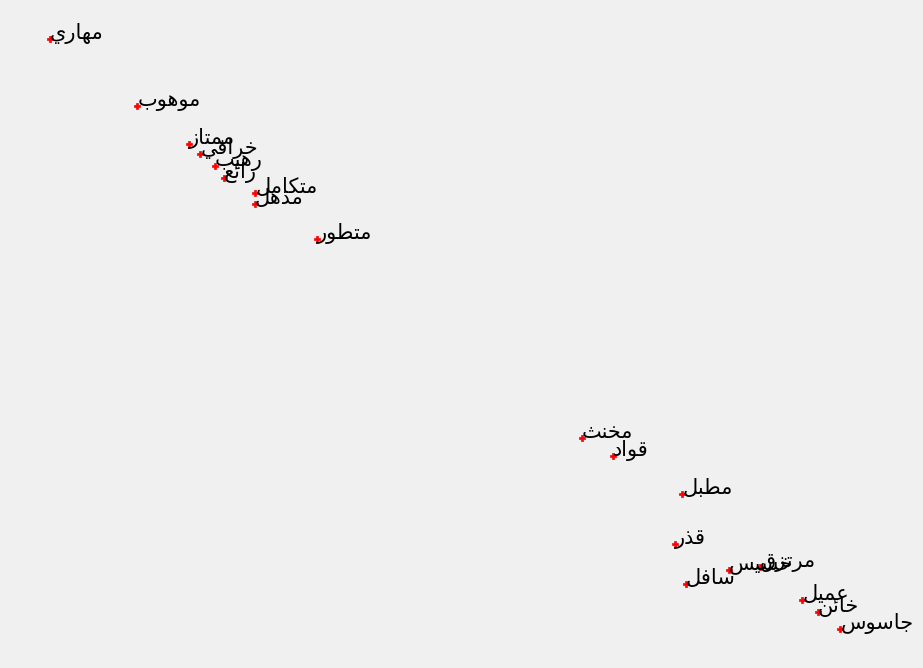

In [84]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(rezk_model, SENTIMENT_WORDS, 250, .07)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "r_SENTIMENT_WORDS.png")

[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 9.311430
[t-SNE] KL divergence after 50 iterations with early exaggeration: 36.588402
[t-SNE] KL divergence after 250 iterations: 0.050656
The shape of our word_features is: (19, 2)


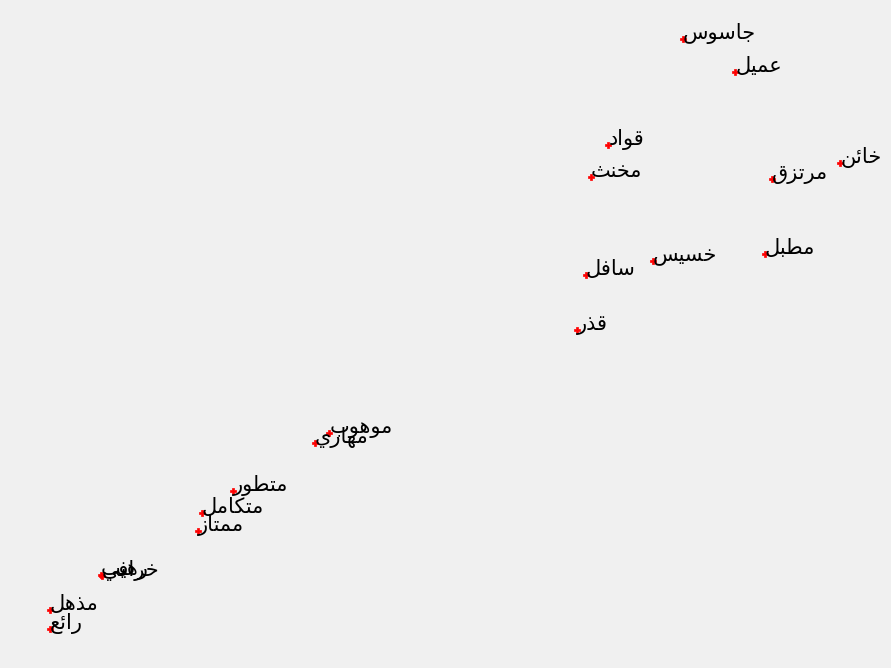

In [85]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(bakr_model, SENTIMENT_WORDS, 250, .07)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "b_SENTIMENT_WORDS.png")

In [86]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(muhammed_model, SENTIMENT_WORDS, 250, .07)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "m_SENTIMENT_WORDS.png")

KeyError: "Key 'خائن' not present"

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 3.076933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.592648
[t-SNE] KL divergence after 1400 iterations: 0.223208
The shape of our word_features is: (60, 2)


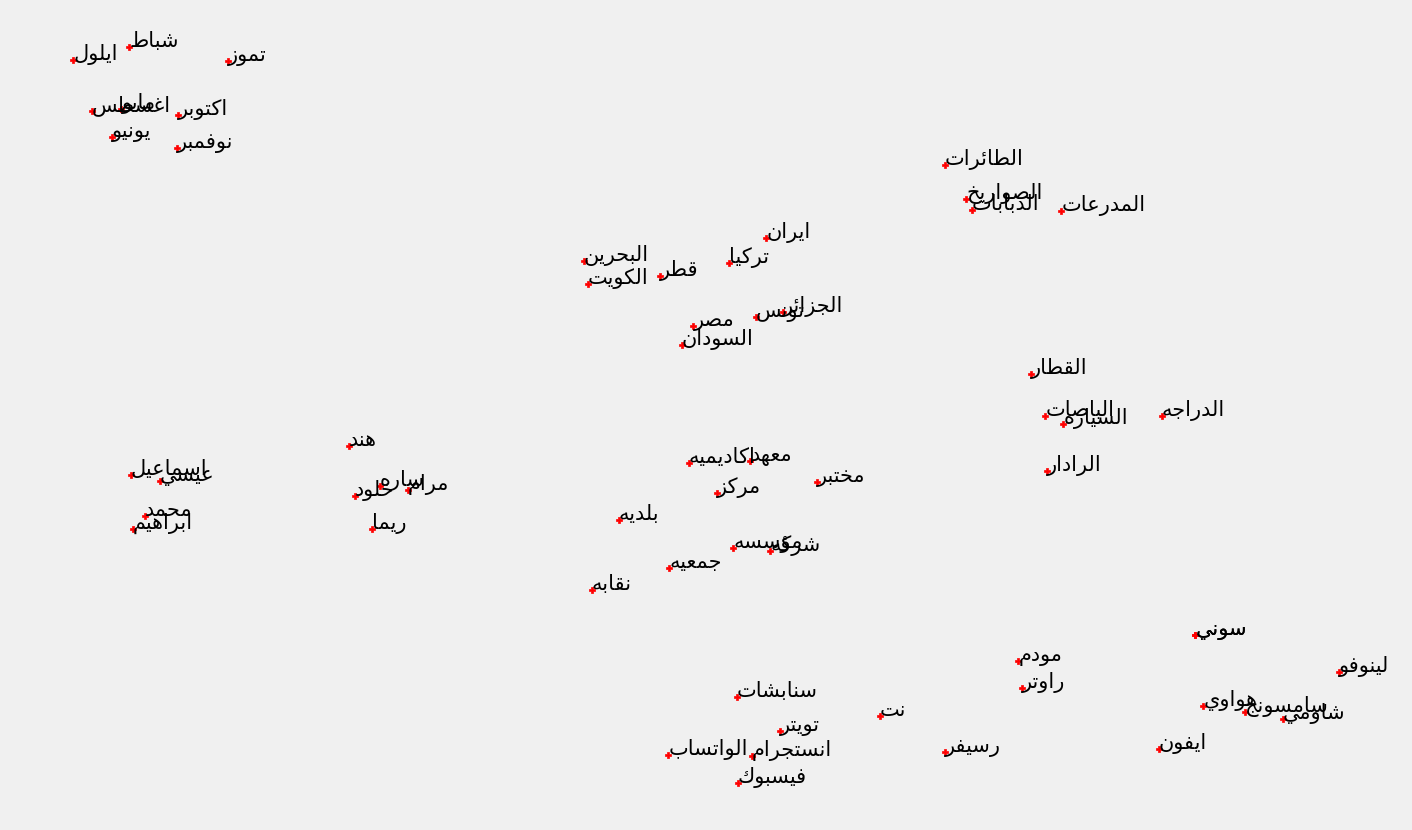

In [109]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(rezk_model, NER_WORDS, 1400, .03)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "r_1_NER_WORDS.png")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 3.076933
[t-SNE] KL divergence after 150 iterations with early exaggeration: 48.592655
[t-SNE] KL divergence after 1400 iterations: 0.216820
The shape of our word_features is: (60, 2)


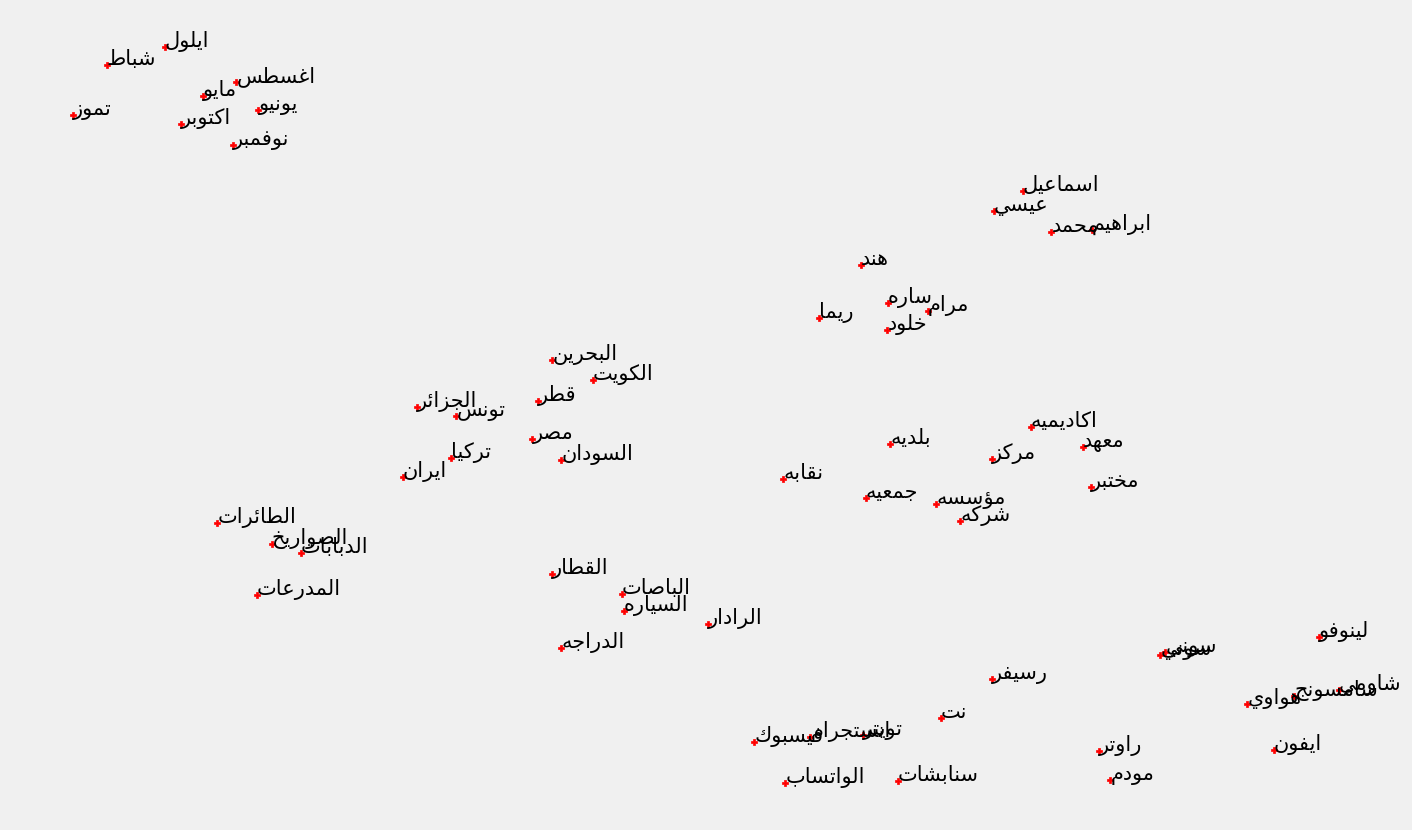

In [110]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(rezk_model, NER_WORDS, 1400, .5)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "r_2_NER_WORDS.png")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 8.597755
[t-SNE] KL divergence after 200 iterations with early exaggeration: 49.491753
[t-SNE] KL divergence after 250 iterations: 1.639405
The shape of our word_features is: (60, 2)


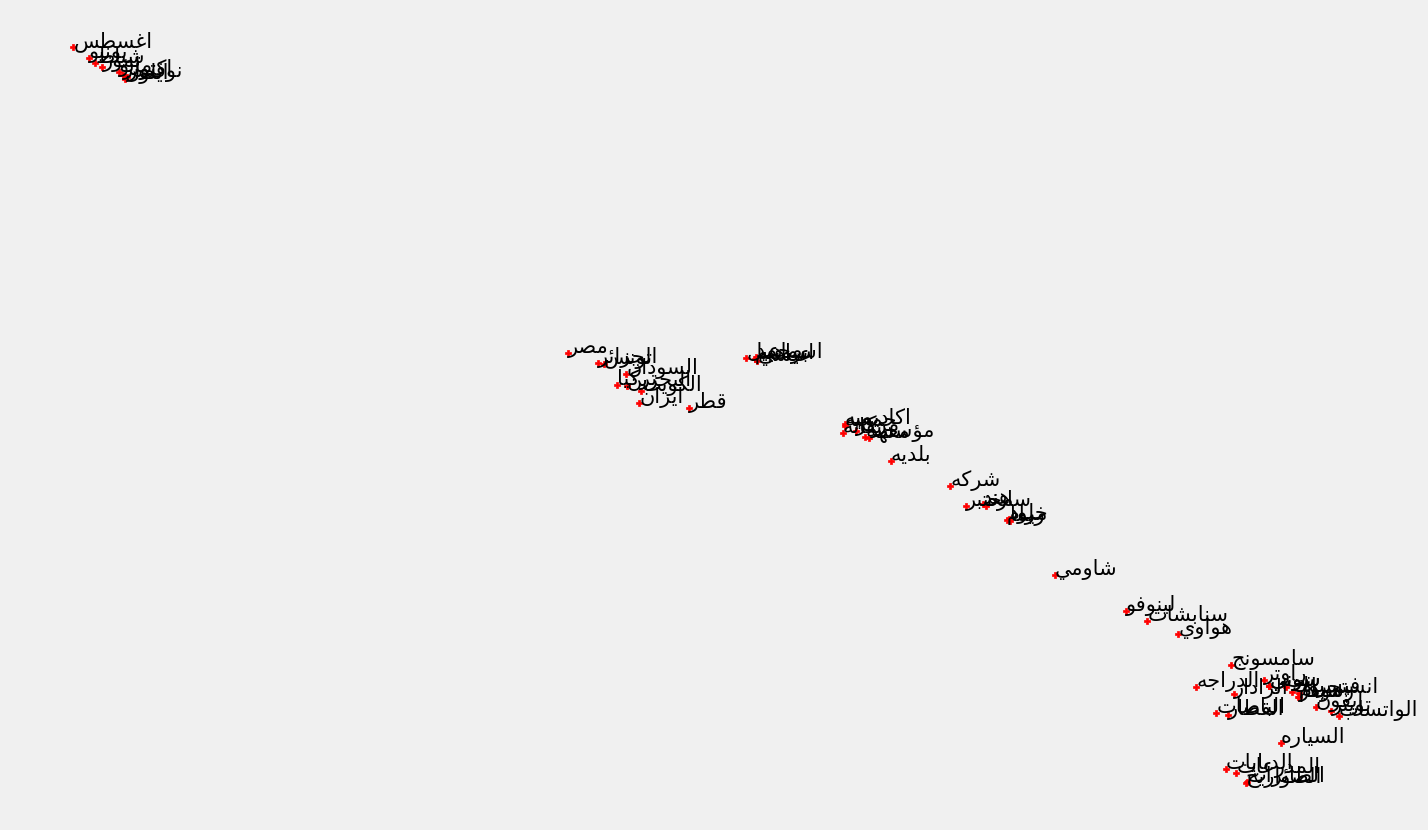

In [111]:
# Reduce the dimension of NER_WORDS (error because min count is 300)
tsne_df_scale = tsne_graph(bakr_model, NER_WORDS, 1400, .03)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "b_1_NER_WORDS.png")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 8.597755
[t-SNE] KL divergence after 50 iterations with early exaggeration: 49.491753
[t-SNE] KL divergence after 1400 iterations: 0.204732
The shape of our word_features is: (60, 2)


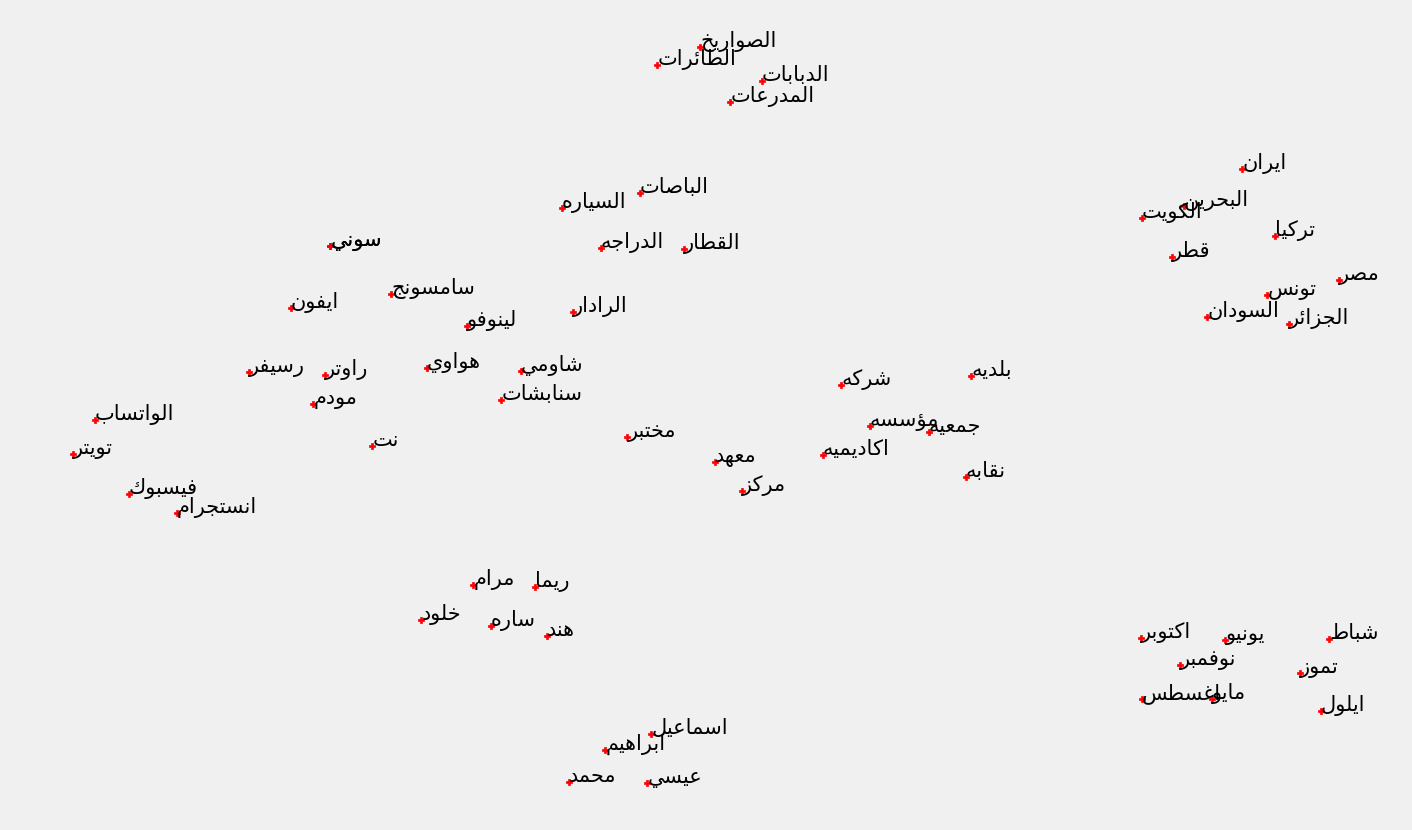

In [112]:
# Reduce the dimension of NER_WORDS (error because min count is 300)
tsne_df_scale = tsne_graph(bakr_model, NER_WORDS, 1400, .5)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "b_2_NER_WORDS.png")

In [101]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(muhammed_model, NER_WORDS, 1400, .5)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "m_NER_WORDS.png")

KeyError: "Key 'راوتر' not present"

In [102]:
print(tokens_to_graphs)

{'O_+_token': ['B_+', 'O_-', 'AB_+', 'A_+', 'فصيله_دم', 'رقم_الملف', 'الفصيله_:', 'فئه_A', '-_O', 'محتاجين_دم'], 'O_+_%': [0.5346683263778687, 0.5326820015907288, 0.3811468780040741, 0.35411107540130615, 0.3521767854690552, 0.3425527513027191, 0.3293618857860565, 0.3264305293560028, 0.3137696087360382, 0.30765408277511597], '🤣_token': ['😆', '😁', '😜', '😏', '😅', '😒', 'هه', '😂', '😬', '😀'], '🤣_%': [0.8333120942115784, 0.8321138024330139, 0.8205730319023132, 0.819418728351593, 0.8010570406913757, 0.7967824339866638, 0.7967004776000977, 0.7781848907470703, 0.7624844312667847, 0.7618412375450134], '🇰🇼_token': ['🇴🇲', 'العيد_الوطني_الكويتي', 'اليوم_الوطني_الكويتي', '🇦🇪', 'الكويت', '🇸🇦', '🇶🇦', 'عمان', '🇯🇴', 'الحبيبه'], '🇰🇼_%': [0.6610525846481323, 0.6014205813407898, 0.5943148732185364, 0.5859056711196899, 0.5772003531455994, 0.5617915987968445, 0.5346092581748962, 0.5341886281967163, 0.5333636999130249, 0.5255107283592224], '🏡_token': ['📍', 'للبيع', 'سكني', 'بالرياض', 'عقارات_الرياض', '🎯', 'فلل